In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
from shapely.geometry import Point
import geopandas
import matplotlib.pyplot as plt
import json

In [10]:
url = 'https://www.ailla.utexas.org/islandora/object/ailla%3Alanguage_collection'  # Replace with your URL
response = requests.get(url)

In [12]:
soup = BeautifulSoup(response.content, 'html.parser')

# Find all elements matching the specified class
elements = soup.find_all('dd', class_='islandora-object-caption')

# Initialize lists to store href and name
href_list = []
name_list = []

# Extract href and name from each element and store them in the lists
for element in elements:
    href = element.a['href']
    name = element.a.text
    href_list.append(href)
    name_list.append(name)

# Create a DataFrame from the lists
df1 = pd.DataFrame({'href': href_list, 'name': name_list})

In [13]:
df1

,href,name
0,/islandora/object/ailla%3A119670,Achi
1,/islandora/object/ailla%3A119504,Achuar
2,/islandora/object/ailla%3A254681,Afro-Asiatic
3,/islandora/object/ailla%3A119717,Aguaruna
4,/islandora/object/ailla%3A284521,Aikanã
...,...,...
99,/islandora/object/ailla%3A119693,Chocholtec
100,/islandora/object/ailla%3A119638,Choco
101,/islandora/object/ailla%3A119634,Ch'ol
102,/islandora/object/ailla%3A283737,Cholon


In [8]:

# Initialize lists to store href and name
href_list = []
name_list = []

# Iterate over pages 1 through 6
for page_num in range(1, 7):
    # Construct the URL for the current page
    url = f'https://www.ailla.utexas.org/islandora/object/ailla%3Alanguage_collection?page={page_num}'

    # Send a GET request to the webpage
    response = requests.get(url)
    
    # Check if the response status code indicates success
    if response.status_code == 200:
        # Parse the HTML content using BeautifulSoup
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Find all elements matching the specified class
        elements = soup.find_all('dd', class_='islandora-object-caption')
        
        # Extract href and name from each element and store them in the lists
        for element in elements:
            href = element.a['href']
            name = element.a.text
            href_list.append(href)
            name_list.append(name)
    else:
        # If the response status code is not 200, print an error message
        print(f"Failed to retrieve page {page_num}. Status code: {response.status_code}")

# Create a DataFrame from the lists
df = pd.DataFrame({'href': href_list, 'name': name_list})

# Display the DataFrame
print(df)


                                 href                      name
0    /islandora/object/ailla%3A119885                      Chon
1    /islandora/object/ailla%3A119609  Chontal, Highland Oaxaca
2    /islandora/object/ailla%3A119536          Chontal, Tabasco
3    /islandora/object/ailla%3A119540                   Chorote
4    /islandora/object/ailla%3A119679                 Chorotega
..                                ...                       ...
523  /islandora/object/ailla%3A119642           Zoque, Tapalapa
524  /islandora/object/ailla%3A119631           Zoque, Tecpatán
525  /islandora/object/ailla%3A119497         Zoque, Texistepec
526  /islandora/object/ailla%3A256189                      Zuni
527  /islandora/object/ailla%3A119534       ZZZZ-Test materials

[528 rows x 2 columns]


In [14]:
conc = pd.concat([df1, df], ignore_index=True)

In [15]:
conc

,href,name
0,/islandora/object/ailla%3A119670,Achi
1,/islandora/object/ailla%3A119504,Achuar
2,/islandora/object/ailla%3A254681,Afro-Asiatic
3,/islandora/object/ailla%3A119717,Aguaruna
4,/islandora/object/ailla%3A284521,Aikanã
...,...,...
627,/islandora/object/ailla%3A119642,"Zoque, Tapalapa"
628,/islandora/object/ailla%3A119631,"Zoque, Tecpatán"
629,/islandora/object/ailla%3A119497,"Zoque, Texistepec"
630,/islandora/object/ailla%3A256189,Zuni


In [16]:
l = conc['name'].to_list()


In [17]:
l

['Achi',
 'Achuar',
 'Afro-Asiatic',
 'Aguaruna',
 'Aikanã',
 'Akateko',
 "Akimel O'odham",
 'Akuntsu',
 'Algonquian',
 'Amahuaca',
 'American Sign Language',
 'Amuzgo',
 'Amuzgo, San Pedro Amuzgos',
 'Andoke',
 'Angaité',
 'Arabic',
 'Arabic, Algerian Spoken',
 'Arapaso',
 'Araucanian',
 'Arawakan',
 'Arawán',
 'Arikapú',
 'Arutani',
 'Asháninka',
 'Ashéninka Perené',
 'Australian languages',
 'Austronesian',
 'Awakateko',
 'Aymara',
 'Aymara, Central',
 'Aymaran',
 'Aymara, Southern',
 'Baniwa',
 'Bará',
 'Barasana',
 'Barbacoan',
 'Baré',
 'Batanga',
 'Belize Kriol',
 'Biloxi',
 'Blackfoot',
 'Bocotá',
 'Bora',
 'Borôro',
 'Brazilian Sign Language',
 'Bribri',
 'Cabécar',
 'Cabiyarí',
 'Cacaopera',
 'Cáhita',
 'Cahuapanan',
 'Cahuilla',
 'Capanahua',
 'Carapana',
 'Cariban',
 'Carijona',
 'Catawba',
 'Central American Indigenous Languages',
 'Central Diegueño (Kumiai)',
 'Chachi',
 'Chatino',
 'Chatino, Eastern, Ixtapan',
 'Chatino, Eastern, San Francisco Ixpantepec',
 'Chatino, Eas

In [18]:
glottolog_data = pd.read_csv('languages_and_dialects_geo.csv')

In [19]:
df_filtered = glottolog_data[glottolog_data['name'].isin(l)]

In [20]:
df_filtered

,glottocode,name,isocodes,level,macroarea,latitude,longitude
86,achi1256,Achi,acr,language,North America,15.07300,-90.3513
92,achu1249,Achuar,NaN,dialect,South America,NaN,NaN
224,agua1253,Aguaruna,agr,language,South America,-5.30044,-77.9218
258,aika1237,Aikanã,tba,language,South America,-12.66950,-60.5353
318,west2635,Akateko,knj,language,North America,15.59320,-91.8421
...,...,...,...,...,...,...,...
21880,yuhu1238,Yuhup,yab,language,South America,0.24850,-69.8079
21881,yuki1244,Yuki,NaN,dialect,North America,NaN,NaN
21882,yukp1241,Yukpa,yup,language,South America,9.67534,-73.0557
21964,zapa1253,Záparo,zro,language,South America,-1.99871,-76.3640


In [21]:
points = df_filtered.apply(lambda r: Point(r.longitude, r.latitude), axis=1)
gdb = geopandas.GeoDataFrame(df_filtered.assign(geometry=points), \
                        crs={'init' :'epsg:4326'})
xys = gdb['geometry'].apply(lambda pt: pd.Series({'x': pt.x, 'y': pt.y}))
gdb['x'] = xys['x']
gdb['y'] = xys['y']

/Users/go202/anaconda3/envs/eq_pap_1/lib/python3.12/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [22]:
worldmap = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))

/var/folders/hw/3z11r39j0gd4kgzxbjj6v8z80000gp/T/ipykernel_52661/867032107.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  worldmap = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))


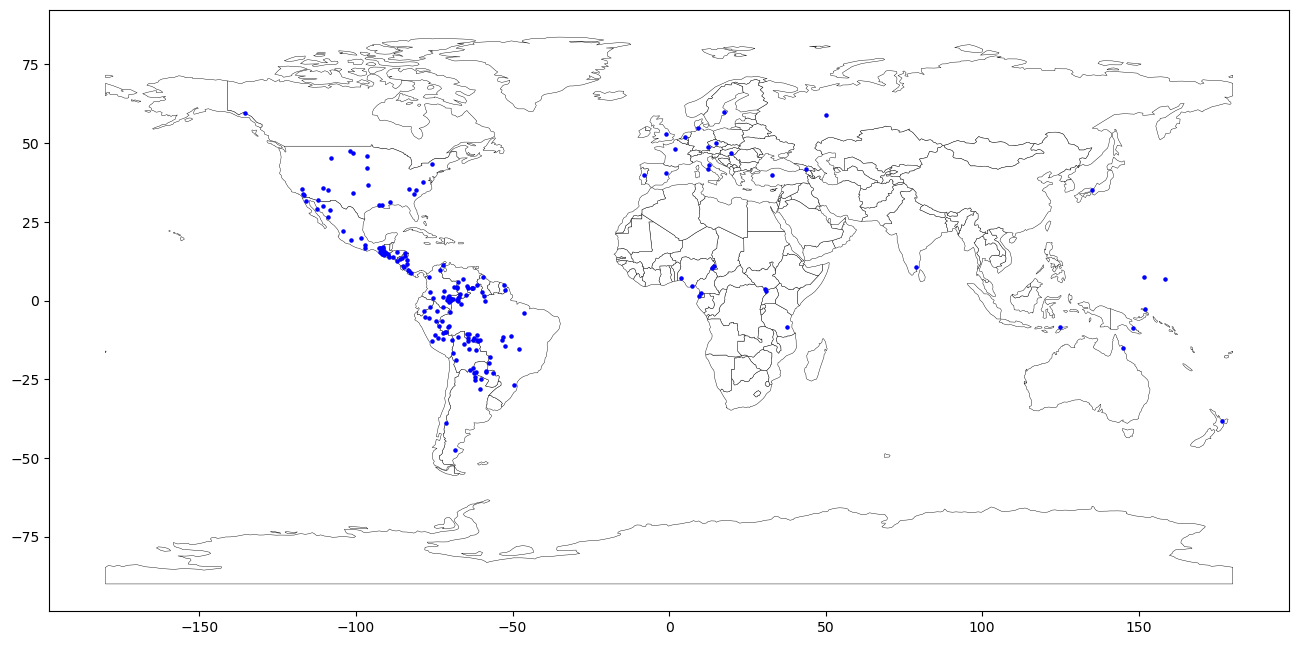

In [23]:
fig, ax = plt.subplots(figsize=(16, 10))
worldmap.plot(color="white", edgecolor = 'black',ax=ax, linewidth=0.3)
gdb.plot(ax=ax, color = 'blue', markersize = 5)
plt.show()